## Sample Weights

This notebook will cover exercise answer.

* Exercise 4.5

As we go along, there will be some explanations.

More importantly, this method can be applied not just within mean-reversion strategy but also other strategies as well. 

Most of the functions below can be found under research/Sampling.

Contact: boyboi86@gmail.com

In [1]:
import numpy as np
import pandas as pd
import research as rs
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

Num of CPU core:  4
Machine info:  Windows-10-10.0.18362-SP0
Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Numpy 1.17.3
Pandas 1.0.3


C:\Users\Wei_X\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<Figure size 1500x800 with 1 Axes>

**Note**

Instead of trend strategy, we will continue to use mean-reversion strategy.

This part will deviate slightly from the exercise, but I assure you the outcome is somewhat similiar.

However using trend strategy, the idea which Dr Marco Lopez wish to express would be obvious since meta-labels would suffer from imbalance sample.

In [2]:
dollar = pd.read_csv('./research/Sample_data/dollar_bars.txt', 
                 sep=',', 
                 header=0, 
                 parse_dates = True, 
                 index_col=['date_time'])


In [3]:
dollar = rs.bband_as_side(data = dollar, 
                          window = 50, 
                          width = 0.001)

dollar['volatility'] = rs.vol(dollar['close'], span0 = 50)

events = rs.cs_filter(dollar['close'], 
                    limit = dollar['volatility'].mean())

vb = rs.vert_barrier(data = dollar['close'], 
                 events = events, 
                 period = 'days', 
                 freq = 1)

tb = rs.tri_barrier(data = dollar['close'], 
                    events = events, 
                    trgt = dollar['volatility'] * 5, 
                    min_req = 0.002, 
                    num_threads = 3, 
                    ptSl = [0,2],
                    t1 = vb, 
                    side = dollar['side'])

mlabel = rs.meta_label(data = dollar['close'], 
                       events = tb, 
                       drop = False) # when you have a side binary, you won't have rare labels usually


Bollinger Band results:

Num of times upper limit touched: 10195
Num of times lower limit touched: 8987


C:\Users\Wei_X\Desktop\Python\research\Labels\triple_barrier_method.py:75: UserWarning: Data and events index shape must be same, reindex data to fit events
  warnings.warn('Data and events index shape must be same, reindex data to fit events')


[                                             t1  sl  pt
2016-04-14 14:56:40.929 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 15:26:56.280 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 15:35:15.960 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 16:14:10.181 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 16:33:11.080 2016-04-15 17:10:42.500 NaT NaT
...                                         ...  ..  ..
2016-12-30 20:59:58.848                     NaT NaT NaT
2016-12-30 21:00:00.352                     NaT NaT NaT
2016-12-30 21:00:24.294                     NaT NaT NaT
2016-12-30 21:03:03.027                     NaT NaT NaT
2016-12-30 21:13:31.990                     NaT NaT NaT

[6043 rows x 3 columns]] this out
[                                             t1  sl  pt
2016-04-14 14:56:40.929 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 15:26:56.280 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 15:35:15.960 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 16:14:10.181 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 

 this out
[                                             t1  sl  pt
2016-04-14 14:56:40.929 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 15:26:56.280 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 15:35:15.960 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 16:14:10.181 2016-04-15 17:10:42.500 NaT NaT
2016-04-14 16:33:11.080 2016-04-15 17:10:42.500 NaT NaT
...                                         ...  ..  ..
2016-12-30 20:59:58.848                     NaT NaT NaT
2016-12-30 21:00:00.352                     NaT NaT NaT
2016-12-30 21:00:24.294                     NaT NaT NaT
2016-12-30 21:03:03.027                     NaT NaT NaT
2016-12-30 21:13:31.990                     NaT NaT NaT

[6043 rows x 3 columns],                                              t1  sl  pt
2015-09-10 12:36:39.559 2015-09-11 12:38:05.265 NaT NaT
2015-09-10 13:01:38.292 2015-09-11 13:30:09.634 NaT NaT
2015-09-10 13:30:20.359 2015-09-11 13:38:02.648 NaT NaT
2015-09-10 13:35:08.110 2015-09-11 13:38:02.648 NaT NaT
2015-09-10 

2020-05-26 15:10:01.322038 100.0% _pt_sl_t1 done after 0.51 minutes. Remaining 0.0 minutes.


In [4]:
mlabel['bin'].value_counts()

0.0    9126
1.0    8967
Name: bin, dtype: int64

In [5]:
# original data matrix report w/o random forest

rs.report_matrix(actual_data = mlabel, 
                 prediction_data = None, 
                 ROC = None)

 Classification Report
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      9126
         1.0       0.50      1.00      0.66      8967

    accuracy                           0.50     18093
   macro avg       0.25      0.50      0.33     18093
weighted avg       0.25      0.50      0.33     18093


 Confusion Matrix
[[TN, FP]
 [FN, TP]]

[[   0 9126]
 [   0 8967]]

 Accuracy Score
0.4956060354833361



C:\Users\Wei_X\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


 Classification Report
              precision    recall  f1-score   support

         0.0       0.53      0.33      0.41      2687
         1.0       0.52      0.71      0.60      2741

    accuracy                           0.52      5428
   macro avg       0.52      0.52      0.50      5428
weighted avg       0.52      0.52      0.50      5428


 Confusion Matrix
[[TN, FP]
 [FN, TP]]

[[ 897 1790]
 [ 804 1937]]

 Accuracy Score
0.5221075902726603



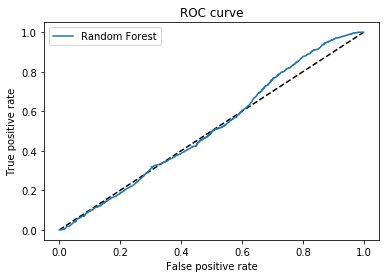

In [6]:
# Exercise 4.5a
# for convienience sake, we will just go for crossing average & volatility as features

X = dollar.drop(['open', 'high', 'low', 'close','cum_vol', 'cum_dollar', 'cum_ticks'], axis = 1)
X.dropna(inplace = True) # we lost quite abit of data

X = X.reindex(mlabel.index)
y = mlabel['bin']

n_estimators, max_depth, c_random_state = 500, 7, 42

# Random Forest Model
rf = RandomForestClassifier(max_depth = max_depth, 
                            n_estimators = n_estimators,
                            criterion = 'entropy',
                            #bootstrap=True,
                            #max_samples = av_uniqueness_by_coevent['tW'].mean()
                            oob_score = False,
                            class_weight = None, # We did not use class weight
                            random_state = c_random_state)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

rf.fit(X_train, y_train.values.ravel())

y_prob_test = rf.predict_proba(X_test)[:, 1] #here we are only interested in True positive
y_pred_test = rf.predict(X_test)

# We go for test data straight
rs.report_matrix(actual_data = y_test, 
                 prediction_data = y_pred_test, 
                 ROC = y_prob_test)

 Classification Report
              precision    recall  f1-score   support

         0.0       0.54      0.31      0.40      2687
         1.0       0.52      0.74      0.61      2741

    accuracy                           0.53      5428
   macro avg       0.53      0.53      0.51      5428
weighted avg       0.53      0.53      0.51      5428


 Confusion Matrix
[[TN, FP]
 [FN, TP]]

[[ 844 1843]
 [ 714 2027]]

 Accuracy Score
0.5289240972733972



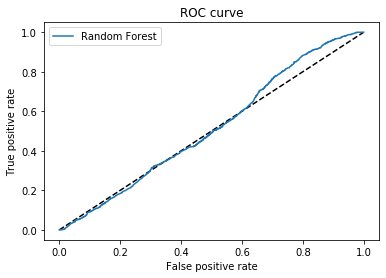

In [7]:
rf_cls_wght_bln = RandomForestClassifier(max_depth = max_depth, 
                                    n_estimators = n_estimators,
                                    criterion = 'entropy',
                                    #bootstrap=True,
                                    #max_samples = av_uniqueness_by_coevent['tW'].mean()
                                    oob_score = False,
                                    class_weight = 'balanced', # We try balance weight only
                                    random_state = c_random_state)

rf_cls_wght_bln.fit(X_train, y_train.values.ravel())

y_prob_test0 = rf_cls_wght_bln.predict_proba(X_test)[:, 1] #here we are only interested in True positive
y_pred_test0 = rf_cls_wght_bln.predict(X_test)

# We go for test data straight
rs.report_matrix(actual_data = y_test, 
                 prediction_data = y_pred_test0, 
                 ROC = y_prob_test0)

 Classification Report
              precision    recall  f1-score   support

         0.0       0.54      0.33      0.41      2687
         1.0       0.53      0.73      0.61      2741

    accuracy                           0.53      5428
   macro avg       0.53      0.53      0.51      5428
weighted avg       0.53      0.53      0.51      5428


 Confusion Matrix
[[TN, FP]
 [FN, TP]]

[[ 878 1809]
 [ 737 2004]]

 Accuracy Score
0.5309506263817244



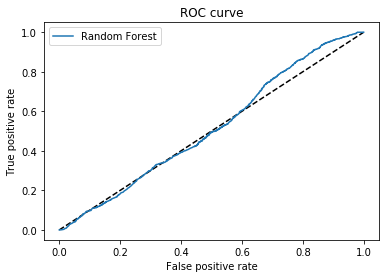

In [8]:
rf_cls_wght_sub_bln = RandomForestClassifier(max_depth = max_depth, 
                                    n_estimators = n_estimators,
                                    criterion = 'entropy',
                                    #bootstrap=True,
                                    #max_samples = av_uniqueness_by_coevent['tW'].mean()
                                    oob_score = False,
                                    class_weight = 'balanced_subsample', # We try balance weight only
                                    random_state = c_random_state)

rf_cls_wght_sub_bln.fit(X_train, y_train.values.ravel())

y_prob_test1 = rf_cls_wght_sub_bln.predict_proba(X_test)[:, 1] #here we are only interested in True positive
y_pred_test1 = rf_cls_wght_sub_bln.predict(X_test)

# We go for test data straight
rs.report_matrix(actual_data = y_test, 
                 prediction_data = y_pred_test1, 
                 ROC = y_prob_test1)

### Conclusion:

#### Accuracy

Class_weight = 'None'.
The Accuracy was about 0.5221075902726603.

Class_weight = 'balance'.
The Accuracy was about 0.5289240972733972.

Class_weight = 'balance_subsample'.
The Accuracy was about 0.5309506263817244 (Highest improvement).

#### Confusion Matrix

The power of a hypothesis test is the probability of making the correct decision if the alternative hypothesis is true, hence to reject a null hypothesis if found to be false.

In our case, null hypothesis is FP (Not True until proven, easily rejected). By focusing on TP, we will increase our ML model's accuracy.

The distribution Postive (TP and FP) experience an increase, when class_weight was set to 'balance' and 'balance_subsample'.

Again, with 'balance_subsample' experience higher allocation to Positive distributions within condusion matrix, which is reflected in their respective accuracy score.

Comparing class weight = 'None' and class_weight = 'balance_subsample', True Positive (TP) experienced a jump from 1937 to 2004. In short, when we set class_weight, we are asking ML model to focus on True region specifically TP.

This is correct and especially true when we have a high imbalance dataset with TP being a minority, this is also the reason why Dr Marco Lopez wanted to demostrate with an imbalance dataset with 2/3 of negatives meta-labels.

For more details refer to Advances in Financial Machine Learning, page 71 - 72, section 4.8.